# Area estimation using the Monte Carlo Simulation
Here we estimate

$I =  \int_{1}^{10} \frac{\ln(x)}{x} \, dx$

using Monte Carlo simulations

## 1. Importing the necessary libraries

In [66]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

## 2. Parameters and Variables Declaration
Here, we give our basic inputs necessary. This includes the function. Here, we have considered,

$f(x) = \frac{\ln(x)}{x}$

For this case, we going to integrate our function in the range $[x_{\text{min}} = 1, x_{\text{max}} = 10]$. As the given $f(x)$ is a simple function, we know the bounds that $[y_{\text{min}} = 0, y_{\text{max}} = \frac{1}{e}]$. If we don't know the curve bounds, then will have to estimate the bounds. 

In this case, we will see the change in the area of $f(x)$ as a function of $N_{\text{sample}}$. For this, we can vary the paramater $sims$ which signiies the number of random samples being taken for the Monte Carlo simulation.

Other than this, we also need to estimate the total box size of the system. This can calculates easily using the $x_{\text{min}}$, $x_{\text{max}}$, $y_{\text{min}}$ and  $y_{\text{max}}$ values. This can be done by visualizing area under the curve as a function of variation in the bounds for a fixed $N_{\text{sample}}$ values.

In [87]:
x_min = 1
x_max = 10
y_min = 0
y_max = 1/math.e

sims = 100000000

def function(a):
    return math.log(a) / a

box_size = abs((x_max - x_min) * (y_max - y_min))

## 3. Co-ordinate generation
Here, we randomly generate arrays of $x$ and $y$ co-ordinates randomly.

In [88]:
# Randomisation in co-ordinate generation
x_coordinate = np.random.uniform(x_min, x_max, sims)
y_coordinate = np.random.uniform(y_min, y_max, sims)

## 4. Estimation of area ratio using the Monte Carlo Method
Here, we apply the basic understanding of the Monte Carlo. In the above randomly generated $x$ and $y$ co-ordinates, we estimate if the point $(x,y)$ is within the curve or not. By doing this, we can estimate the ratio of area of $f(x)$ to the total box size. The area within the curve will be,

$Ratio = \frac{N_{\text{points, inside the curve}}}{N_{\text{points, total}}}$

$I = Ratio \times A_{\text{box}}$

In [89]:
inside = 0
total = 0

for i in range(sims):
    a = x_coordinate[i]
    b = y_coordinate[i]
    c = function(a)
    if b < c:
        inside += 1
    total += 1

In [90]:
ratio = inside/total
area_under_the_curve = ratio*box_size
print(area_under_the_curve)

2.6510888843653158


## Visualzing $I$ as a function of $N_{{sample}}$
After doing simulations for different  $N_{{sample}}$, we can generate a dataset. This dataset can be plotted to obtain variation in $I$ as a function of $N_{{sample}}$.

Text(0, 0.5, 'Integral value, $I$ (-)')

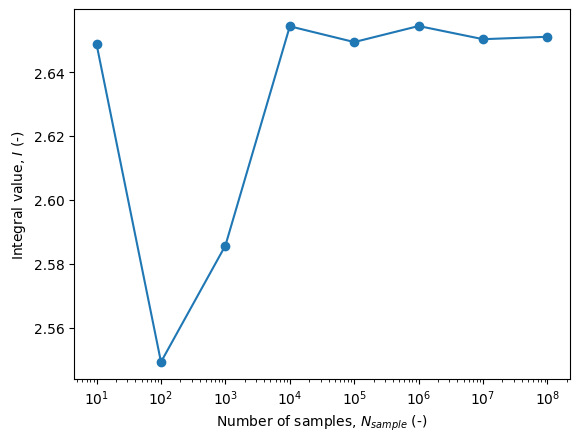

In [91]:
samples = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
area = [2.648731976434385, 2.5494045273180954, 2.585824591994068, 2.6543605318843078, 2.6494272685781985, 2.654446615673542, 2.650329823999169, 2.6510888843653158]
plt.semilogx(samples, area, marker='o')
plt.xlabel('Number of samples, $N_{{sample}}$ (-)')
plt.ylabel('Integral value, $I$ (-)')

## Conclusion:
The area under the curve can be obtained using the Monte Carlo method. This method can be used to obtain integral values for complex functions whose anaytical solution for integral can be obtained.